In [1]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 80% !important; }</style>"))

In [3]:
import sys
import time
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import colors

In [4]:
myColors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
            '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe',
            '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
            '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 
            '#307D7E', '#000000', "#DDEFFF", "#000035", "#7B4F4B", 
            "#A1C299", "#300018", "#C2FF99", "#0AA6D8", "#013349", 
            "#00846F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", 
            "#1E6E00", "#DFFB71", "#868E7E", "#513A01", "#CCAA35"]

colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [5]:
import smashpy
sf = smashpy.smashpy()

 * Initialising ...



# Loading annData object

In [7]:
obj = sc.read_h5ad('../../../External_datasets/CITEseq.h5ad')

In [8]:
obj.raw = obj.copy()
obj.layers["nome"] = obj.X.copy()
obj.layers["log"] = obj.X.copy()
obj.layers["scale"] = obj.X.copy()

In [9]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

500 genes across 8617 cells


#### ensemble_learning

In [10]:
s2 = time.time()

Running with Balanced Random Forest


<Figure size 432x288 with 0 Axes>

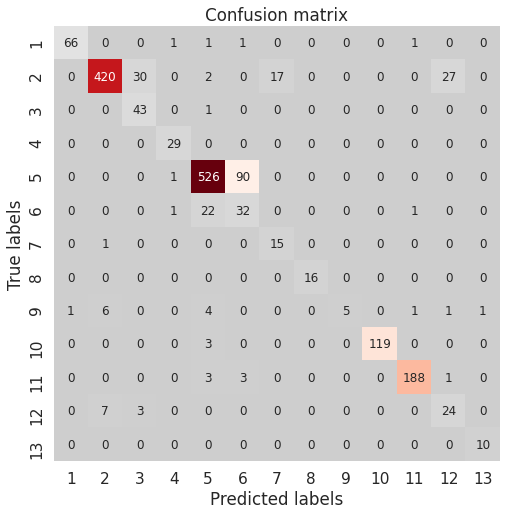

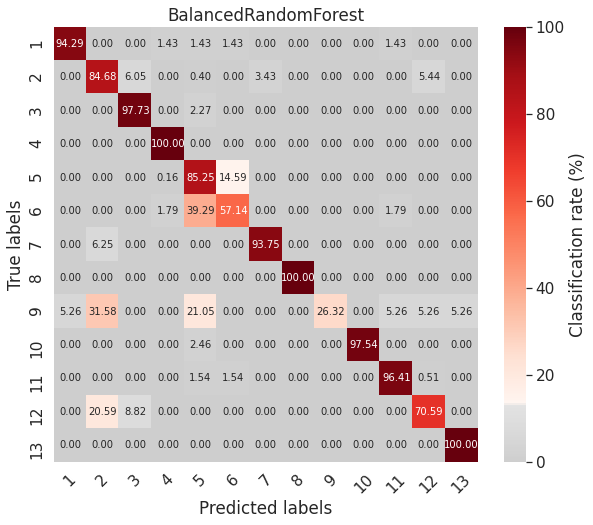

Accuracy: 0.8660092807424594: Misclassification: 0.13399071925754058
              precision    recall  f1-score   support

           1       0.99      0.94      0.96        70
           2       0.97      0.85      0.90       496
           3       0.57      0.98      0.72        44
           4       0.91      1.00      0.95        29
           5       0.94      0.85      0.89       617
           6       0.25      0.57      0.35        56
           7       0.47      0.94      0.62        16
           8       1.00      1.00      1.00        16
           9       1.00      0.26      0.42        19
          10       1.00      0.98      0.99       122
          11       0.98      0.96      0.97       195
          12       0.45      0.71      0.55        34
          13       0.91      1.00      0.95        10

    accuracy                           0.87      1724
   macro avg       0.80      0.85      0.79      1724
weighted avg       0.91      0.87      0.88      1724



In [11]:
clf = sf.ensemble_learning(obj, group_by="labels", classifier="BalancedRandomForest", balance=True, verbose=True)

#### gini_importance

In [12]:
selectedGenes, selectedGenes_dict = sf.gini_importance(obj, clf, group_by="labels", verbose=True, restrict_top=("local", 20))

In [13]:
e2 = time.time()

#### Classifiers

<Figure size 432x288 with 0 Axes>

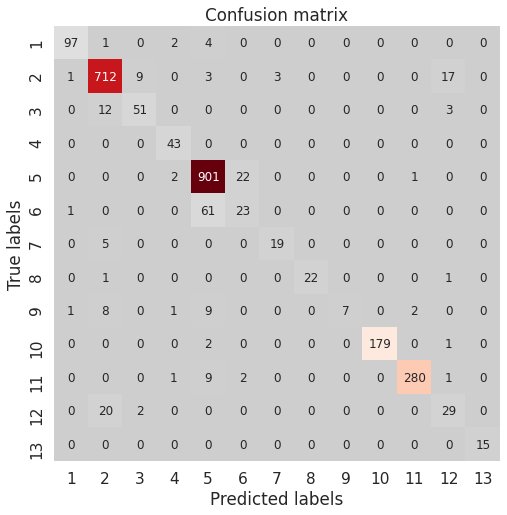

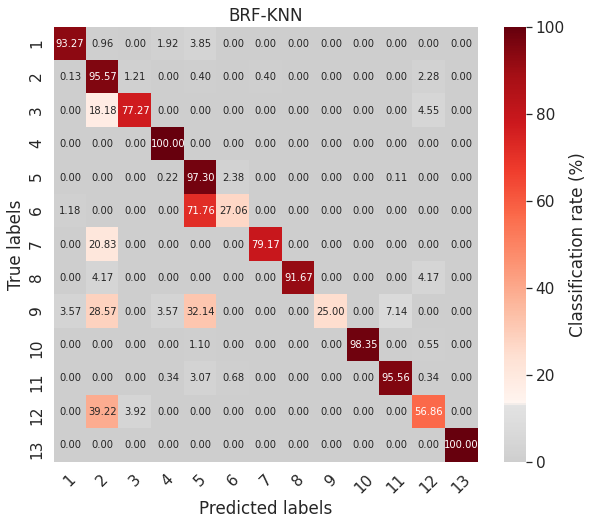

Accuracy: 0.9195668986852281: Misclassification: 0.08043310131477188
              precision    recall  f1-score   support

           1       0.97      0.93      0.95       104
           2       0.94      0.96      0.95       745
           3       0.82      0.77      0.80        66
           4       0.88      1.00      0.93        43
           5       0.91      0.97      0.94       926
           6       0.49      0.27      0.35        85
           7       0.86      0.79      0.83        24
           8       1.00      0.92      0.96        24
           9       1.00      0.25      0.40        28
          10       1.00      0.98      0.99       182
          11       0.99      0.96      0.97       293
          12       0.56      0.57      0.56        51
          13       1.00      1.00      1.00        15

    accuracy                           0.92      2586
   macro avg       0.88      0.80      0.82      2586
weighted avg       0.91      0.92      0.91      2586



In [14]:
sf.run_classifiers(obj, group_by="labels", genes=selectedGenes, classifier="KNN", balance=True, title="BRF-KNN")

#### Sorting genes per cluster

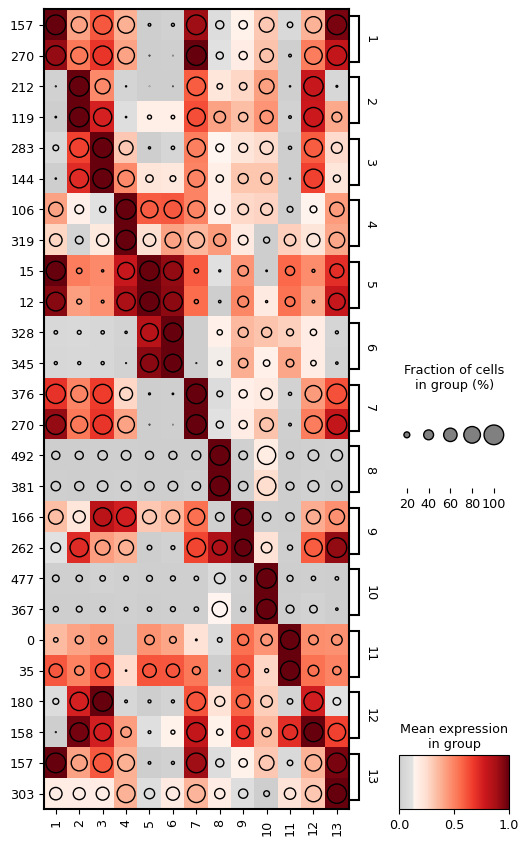

In [15]:
axs, selectedGenes_top_dict = sf.sort_and_plot(obj, selectedGenes, group_by="labels", top=2, figsize=(6,10), restricted=False)

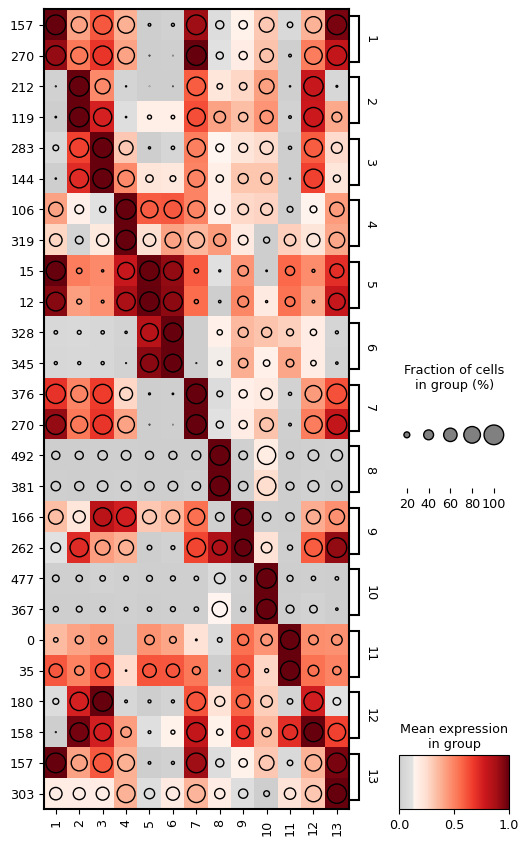

In [16]:
axs.savefig("Figures/BRF_top5_perGroup.pdf")

# Elapsed time

In [17]:
print("%d genes across %s cells"%(obj.n_vars, obj.n_obs))

500 genes across 8617 cells


In [18]:
print('Elapsed time (s): ', e2-s2)

Elapsed time (s):  4.078658103942871
